<a href="https://colab.research.google.com/github/carolines96/Final-Code-Env617/blob/main/Final_Project_Final_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0. Introduction
Hallo en welkom! Hello and welcome to our Final Project for ENV 617!

The research question we seek to answer is: **what is the relationship between urban trees in Amsterdam, Netherlands and socio-economic indicators, such as house price, and climate risk, such as flood risk?**

These are important questions to explore as the effects of a globally changing climate are threatening lives and livelihoods around the world. One solution to mitigate the effects of climate change is managing urban trees to increase the overall urban tree canopy coverage. Urban trees are an invaluable resource to urban areas because of the range of benefits and ecosystem services they support, such as: cooling streets, filtering air pollution, managing stormwater, reducing flooding, protecting biodiversity, providing areas for shade, and increasing social cohesion.

The goals of this research intend to answer these questions and shed light on the dynamics of urban tree canopy cover in cities. Hopefully, the results can encourage cities of similar size, density, and weather patterns to develop urban tree management programs to address the challenges of climate change.

# 2.0 Source Data
The best available data to answer our questions is sourced from the Open Geodata website from the Municipality of Amsterdam, linked here: https://maps.amsterdam.nl/open_geodata/. The website license grants users a license to use and reuse the downloaded dataset for any lawful purpose, including non-commercial and commercial purposes.


The data set collected for this research question included four data sets from the Municipality of Amsterdam:

 -1.  "Trees". This raw data was last updated in September 2023 and contains information on trees maintained by the municipality of Amsterdam. Information includes the species name, tree height, trunk diameter, year planted, and location. Coordinates are in WGS84. The file downloaded was a csv Excel, reformatted to a shared google sheet to support a reproducible final analysis, and imported as a csv. (See 2.2.1)

 -2.  "Climate - Flood". This raw data was last updated January 2020 and contains information collected and analyzed by the Climate Adaptation team of the municpality of Amsterdam. Information includes the chance_code, opportunity, depth_code, depth, and location. Coordinates are in WGS84. The file downloaded was a csv Excel, reformatted to a shared google sheet to support a reproducible final analysis, and imported as a GeoJSON. (See 2.2.2)

 -3.  "Housing value - 2022". This raw data was last updated in 2022 and contains points from the Land Registry without any address data nor data aggregated by neighborhood or district to maintain privacy. Coordinates are in WGS84. The file downloaded was a csv Excel, reformatted to a shared google sheet to support a reproducible final analysis, and imported as a GeoJSON. (2.2.3)

 -4. "Layout Neighborhood". This raw data was last updated in April 2022 and contains data collected and maintained by the Municipality of Amsterdam - Research, Information and Statistics. Information includes neighborhood code, district code, area code, and other useful spatial boundary setting codes to support the map making components and visualizations of the project. Coordinates are in WGS84. The file downloaded was a csv Excel, reformatted to a shared google sheet to support a reproducible final analysis, and imported as a GeoJSON. (See 2.2.4)



Immediate limitations of the data available include the timeframe of each data set last updated, and the completeness of the Tree data.

 - The timeframe of each data set last updated varies. The Tree data is most regularly updated (last in 2023), yet the Climate Flood data was last updated three years prior (January 2020). There is likely additional information on Climate Flooding in Amsterdam over the last three - four years, but this does not reflect that.

 - The Tree data set contains tree information of up to 267,974 trees. According to the Municipality of Amsterdam, the city manages and maintains approximately 300,000 trees. This data reflects that approximate number. However, the Municipality of Amsterdam also reports that approximately 1 million trees are planted throughout the city. The available data set does not reflect the remaining 700,000+ trees throughout the city, and so the analysis is limited to only trees maintained by the city.

## 2.1 Input Python Libraries
Time to input the several Python libraries to ensure our data is ready to be analyzed.



In [1]:
# basics
import pandas as pd
import numpy as np

# geo
import geopandas as gpd
import matplotlib.pyplot as plt

# plotting
from plotnine import *
import plotnine

#Statistical tests
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# CRS
!pip install pyproj
from pyproj import CRS

## 2.2 Import data!

### 2.2.1 Import csv of tree ("Bomen") data

In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTksAFzQ2II9CXyLpdY5OYsY3LT65daQ2q23WQrpCTNyDaehG-2iZGL8_0XH5TrC57ZSUJAVvLaqbgQ/pub?gid=2030450972&single=true&output=csv'
df_tree = pd.read_csv(url)
df_tree.head()

,OBJECTNUMMER,id,soortnaam,soortnaamKort,SoortnaamNL,soortnaamTop,boomhoogteklasseActueel,stamdiameterklasse,jaarVanAanleg,typeObject,standplaatsGedetailleerd,typeBeheerderPlus,typeEigenaarPlus,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT
0,1,919934,Ulmus hollandica `Vegeta`,Ulmus,Huntingdon-iep,Iep (Ulmus),b. 6 tot 9 m.,NaN,1978,Boom niet vrij uitgroeiend,Tegels,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.9026919 52.340093),POINT(52.340093 4.9026919),4.902692,52.340093
1,2,919935,Fraxinus excelsior `Westhof`s Glorie`,Fraxinus,Gewone es (cultuurvariëteit),Es (Fraxinus),c. 9 tot 12 m.,"0,2 tot 0,3 m.",1990,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.8552081 52.331984),POINT(52.331984 4.8552081),4.855208,52.331984
2,3,919936,Ulmus glabra `Lutescens`,Ulmus,Gele bergiep (cultuurvariëteit),Iep (Ulmus),b. 6 tot 9 m.,NaN,2002,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.9036699 52.348837),POINT(52.348837 4.9036699),4.903670,52.348837
3,4,919937,Quercus robur,Quercus,Zomereik,Eik (Quercus),b. 6 tot 9 m.,NaN,1985,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.875886 52.341056),POINT(52.341056 4.875886),4.875886,52.341056
4,5,919939,Styphnolobium japonicum,Overig,Honingboom,Styphnolobium,a. tot 6 m.,NaN,2002,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.8803689 52.332891),POINT(52.332891 4.8803689),4.880369,52.332891


To translate the key columns of this data set from Dutch to English, the translations are below:

OBJECTNUMMER: Unique identifier for each tree object.

id: Another identifier associated with each tree object.

soortnaam: Full name of the tree species.

soortnaamKort: Abbreviated or shortened names of the tree species.

SoortnaamNL: Dutch name of the tree species.

soortnaamTop: Top-level categorization or classification of the tree species.

boomhoogteklasseActueel: Current height class of the tree.

stamdiameterklasse: Diameter class of the tree trunk.

jaarVanAanleg: Year of planting or establishment of the tree.

typeObject: Type or category of the tree object.

geometry: Geographical coordinates or spatial information.

WKT_LAT_LNG: Latitude and longitude coordinates of the trees in Well-Known

Text (WKT) format.

LNG: Longitude coordinates of the trees.

LAT: Latitude coordinates of the trees.

2.2.1.1 Review the tree data and understand the column names, count, dtype, and overall structure of the data set.

In [3]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267974 entries, 0 to 267973
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   OBJECTNUMMER              267974 non-null  int64  
 1   id                        267974 non-null  int64  
 2   soortnaam                 267974 non-null  object 
 3   soortnaamKort             267974 non-null  object 
 4   SoortnaamNL               267974 non-null  object 
 5   soortnaamTop              267974 non-null  object 
 6   boomhoogteklasseActueel   259733 non-null  object 
 7   stamdiameterklasse        77450 non-null   object 
 8   jaarVanAanleg             267974 non-null  int64  
 9   typeObject                262978 non-null  object 
 10  standplaatsGedetailleerd  132637 non-null  object 
 11  typeBeheerderPlus         267924 non-null  object 
 12  typeEigenaarPlus          261884 non-null  object 
 13  WKT_LNG_LAT               267974 non-null  o

In [4]:
df_tree.describe()

,OBJECTNUMMER,id,jaarVanAanleg,LNG,LAT
count,267974.000000,2.679740e+05,267974.000000,267974.000000,267974.000000
mean,133987.500000,1.140768e+06,1795.439845,4.894665,52.355078
std,77357.574855,4.443051e+05,587.047303,0.062561,0.031069
min,1.000000,9.199330e+05,0.000000,4.758417,52.279703
25%,66994.250000,9.894592e+05,1970.000000,4.849114,52.330768
50%,133987.500000,1.059806e+06,1985.000000,4.893064,52.354361
75%,200980.750000,1.129505e+06,2000.000000,4.941897,52.379140
max,267974.000000,4.327015e+06,2095.000000,5.084949,52.425254


In [5]:
df_tree.isnull().sum()

OBJECTNUMMER                     0
id                               0
soortnaam                        0
soortnaamKort                    0
SoortnaamNL                      0
soortnaamTop                     0
boomhoogteklasseActueel       8241
stamdiameterklasse          190524
jaarVanAanleg                    0
typeObject                    4996
standplaatsGedetailleerd    135337
typeBeheerderPlus               50
typeEigenaarPlus              6090
WKT_LNG_LAT                      0
WKT_LAT_LNG                      0
LNG                              0
LAT                              0
dtype: int64

In [6]:
df_tree.nunique()

OBJECTNUMMER                267974
id                          267974
soortnaam                     1542
soortnaamKort                   17
SoortnaamNL                    669
soortnaamTop                   189
boomhoogteklasseActueel          8
stamdiameterklasse               7
jaarVanAanleg                  151
typeObject                       9
standplaatsGedetailleerd        39
typeBeheerderPlus               40
typeEigenaarPlus                 9
WKT_LNG_LAT                 266627
WKT_LAT_LNG                 266627
LNG                         207977
LAT                         144049
dtype: int64

### 2.2.2. Import geojson of flood risk ("klimaat overstroming") data


In [7]:
gdf_flood = gpd.read_file(
    "https://maps.amsterdam.nl/open_geodata/geojson_latlng.php?KAARTLAAG=KLIMAAT_OVERSTROMING&THEMA=klimaatadaptatie",
    driver="GeoJSON"
)

In [8]:
gdf_flood.head()

,Kans_code,Kans,Diepte_code,Diepte,geometry
0,2,Extreem kleine kans: <1/30.000 per jaar,1,,"MULTIPOLYGON (((52.37255 4.89381, 52.37165 4.8..."
1,3,Zeer kleine kans: 1/3.000 tot 1/30.000 per jaar,2,0 tot 50 cm,"MULTIPOLYGON (((52.36984 4.89238, 52.36895 4.8..."
2,2,Extreem kleine kans: <1/30.000 per jaar,1,,"MULTIPOLYGON (((52.37163 4.88863, 52.36917 4.8..."
3,3,Zeer kleine kans: 1/3.000 tot 1/30.000 per jaar,2,0 tot 50 cm,"MULTIPOLYGON (((52.36623 4.88801, 52.36624 4.8..."
4,2,Extreem kleine kans: <1/30.000 per jaar,1,,"MULTIPOLYGON (((52.37349 4.90555, 52.37439 4.9..."


ANALYSIS: The first four columns of the Climate Flood data set require further analysis to understand the relationship to other data sets. The translation from Dutch to English for the bucketing is as follows:

Kans = Chance

Diepte = Depth


The "Kans_code" and "Diepte_code" represent separate categorical variables indicating different levels or categories of flood risk. The "Kans_code" represents the level of probability or chance of a flood event, while the "Diepte_code" represents the depth of the flood.

In this dataset, it appears that a higher value of "Kans_code" corresponds to a higher probability of a flood event, while a higher value of "Diepte_code" corresponds to a greater depth of flooding. Thus, a lower "Kans_code" would mean a lower probability of a flood event, but it doesn't necessarily imply a lower depth of flooding. Similarly, a lower "Diepte_code" would mean a shallower depth of flooding, but it doesn't necessarily imply a lower probability of a flood event.

With this background context in mind, it is also critical to know how the code is set. This data set was designed and maintained by the Climate Adaptation Team at the Municipality of Amsterdam. According to the Team and their website, the data was collected based on a location-based flood probability  that a specific location will experience a flood. While flood depth may vary from flood to flood,locations within an area protected by dikes can vary greatly in their risk of flooding. In areas with a relatively high risk of flooding, it is useful to further explore the flood risk. When drawing up the map, the maximum permissible risk of flooding for primary flood defenses as set out in the Water Act was assumed. This safety standard must be achieved by 2050. For regional flood defenses, the current provincial standard was used when drawing up the map. Because flood defenses are usually designed in such a way that they meet the standard for at least 50 years (taking climate effects into account), they are (much) stronger than the standard requires in the first decades and the localized risk of flooding is smaller.

While it is not clear what specific metrices and variables went into finalizing the code for Kans (Chance) and Diepte (Depth), more information on the Dutch Flood Management Process is available here: https://www.klimaateffectatlas.nl/nl/ and https://www.klimaateffectatlas.nl/nl/kaartverhalen

2.2.2.1.
Plot the flood risk data on the map to confirm the geospatial capabilities of geojson appear.

<Axes: >

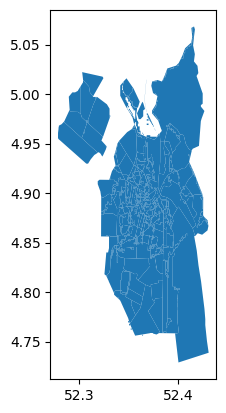

In [9]:
gdf_flood.plot()

2.2.2.2.
Let's make it a bit nicer!


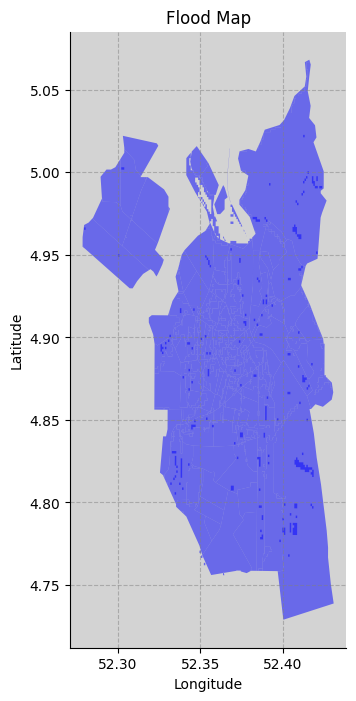

In [10]:
# Plot the map
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the flood data
gdf_flood.plot(ax=ax, color='blue', alpha=0.5, edgecolor='none')

# Add title and labels
ax.set_title('Flood Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Customize the background
ax.set_facecolor('lightgrey')

# Add grid lines
ax.grid(True, linestyle='--', color='grey', alpha=0.5)

# Remove axes spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### 2.2.3. Import GeoJSON of housing value ("housingvalue_2022") data

In [11]:
gdf_housing = gpd.read_file(
    "https://maps.amsterdam.nl/open_geodata/geojson_latlng.php?KAARTLAAG=WONINGWAARDE_2022&THEMA=woningwaarde",
    driver="GeoJSON"
)

### 2.2.4 Import GeoJSON of neighborhoods in Amsterdam

In [12]:
gdf_neighborhoods = gpd.read_file(
    "https://maps.amsterdam.nl/open_geodata/geojson_latlng.php?KAARTLAAG=INDELING_BUURT&THEMA=gebiedsindeling",
    driver="GeoJSON"
)

# 3.0 Clean Data

## 3.1 Flood Risk Data Cleaning

In order to calculate the accurate area of each polygon, the GeoDataFrame must be reprojected to align the proper coordinate reference system (CRS) for Amsterdam. Geographic datasets often employ different CRSs, each with its own set of coordinate values and units. By adjusting the reprojection, we ensure precise measurements aligned with Amsterdam's spatial characteristics, facilitating accurate area calculations for each polygon.

Next, we will reproject the data to properly preserve the spatial analysis of the data for compatability, analysis, and visualization. According to the reference, https://epsg.io/28992#google_vignette, the Netherlands CRS is 'ESPG:28992'.

In [13]:
projected_crs = 'EPSG:28992'
gdf_flood = gdf_flood.to_crs(projected_crs)
#Check to make sure it worked
gdf_flood.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

Calculate the area of each polygon in a new column so that we can eventually calculate tree density.

In [14]:
gdf_flood['area_sqm'] = gdf_flood.geometry.area
gdf_flood['area_sqkm'] = gdf_flood['area_sqm'] / 1000000

Add a unique ID number to each flood area polygon, because there are currently no identifiers for each area.

In [15]:
gdf_flood['flood_area_id'] = range(1, len(gdf_flood) + 1)

## 3.2 Tree Data Cleaning

Use the latitude and longitude columns to create "point" geometries, so that we can identify the geospatial position of each tree. The geometries will be put into a new column.

In [16]:
from shapely.geometry import Point
df_tree['geometry'] = df_tree.apply(lambda row: Point(row['LAT'], row['LNG']), axis=1)
df_tree.head()

,OBJECTNUMMER,id,soortnaam,soortnaamKort,SoortnaamNL,soortnaamTop,boomhoogteklasseActueel,stamdiameterklasse,jaarVanAanleg,typeObject,standplaatsGedetailleerd,typeBeheerderPlus,typeEigenaarPlus,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,geometry
0,1,919934,Ulmus hollandica `Vegeta`,Ulmus,Huntingdon-iep,Iep (Ulmus),b. 6 tot 9 m.,NaN,1978,Boom niet vrij uitgroeiend,Tegels,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.9026919 52.340093),POINT(52.340093 4.9026919),4.902692,52.340093,POINT (52.340093 4.9026919)
1,2,919935,Fraxinus excelsior `Westhof`s Glorie`,Fraxinus,Gewone es (cultuurvariëteit),Es (Fraxinus),c. 9 tot 12 m.,"0,2 tot 0,3 m.",1990,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.8552081 52.331984),POINT(52.331984 4.8552081),4.855208,52.331984,POINT (52.331984 4.8552081)
2,3,919936,Ulmus glabra `Lutescens`,Ulmus,Gele bergiep (cultuurvariëteit),Iep (Ulmus),b. 6 tot 9 m.,NaN,2002,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.9036699 52.348837),POINT(52.348837 4.9036699),4.903670,52.348837,POINT (52.348837 4.9036699)
3,4,919937,Quercus robur,Quercus,Zomereik,Eik (Quercus),b. 6 tot 9 m.,NaN,1985,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.875886 52.341056),POINT(52.341056 4.875886),4.875886,52.341056,POINT (52.341056 4.875886)
4,5,919939,Styphnolobium japonicum,Overig,Honingboom,Styphnolobium,a. tot 6 m.,NaN,2002,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.8803689 52.332891),POINT(52.332891 4.8803689),4.880369,52.332891,POINT (52.332891 4.8803689)


For analysis to come, turn the tree dataframe into a GeoDataFrame, knowing that there is a geospatial component that will be part of the analysis.

In [17]:
gdf_tree = gpd.GeoDataFrame(df_tree, geometry='geometry')
gdf_tree.head()

,OBJECTNUMMER,id,soortnaam,soortnaamKort,SoortnaamNL,soortnaamTop,boomhoogteklasseActueel,stamdiameterklasse,jaarVanAanleg,typeObject,standplaatsGedetailleerd,typeBeheerderPlus,typeEigenaarPlus,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,geometry
0,1,919934,Ulmus hollandica `Vegeta`,Ulmus,Huntingdon-iep,Iep (Ulmus),b. 6 tot 9 m.,NaN,1978,Boom niet vrij uitgroeiend,Tegels,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.9026919 52.340093),POINT(52.340093 4.9026919),4.902692,52.340093,POINT (52.34009 4.90269)
1,2,919935,Fraxinus excelsior `Westhof`s Glorie`,Fraxinus,Gewone es (cultuurvariëteit),Es (Fraxinus),c. 9 tot 12 m.,"0,2 tot 0,3 m.",1990,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.8552081 52.331984),POINT(52.331984 4.8552081),4.855208,52.331984,POINT (52.33198 4.85521)
2,3,919936,Ulmus glabra `Lutescens`,Ulmus,Gele bergiep (cultuurvariëteit),Iep (Ulmus),b. 6 tot 9 m.,NaN,2002,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.9036699 52.348837),POINT(52.348837 4.9036699),4.903670,52.348837,POINT (52.34884 4.90367)
3,4,919937,Quercus robur,Quercus,Zomereik,Eik (Quercus),b. 6 tot 9 m.,NaN,1985,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.875886 52.341056),POINT(52.341056 4.875886),4.875886,52.341056,POINT (52.34106 4.87589)
4,5,919939,Styphnolobium japonicum,Overig,Honingboom,Styphnolobium,a. tot 6 m.,NaN,2002,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,POINT(4.8803689 52.332891),POINT(52.332891 4.8803689),4.880369,52.332891,POINT (52.33289 4.88037)


Once again, we will project the dataset with the correct CRS.

In [18]:
gdf_tree.crs = CRS('EPSG:4326')
projected_crs = 'EPSG:28992'
gdf_tree = gdf_tree.to_crs(projected_crs)
df_tree['geometry'] = df_tree.apply(lambda row: Point(row['LAT'], row['LNG']), axis=1)

## 3.3 Housing Data Cleaning

Once again, change the projection of the GeoDataFrame CRS.

In [19]:
projected_crs = 'EPSG:28992'
gdf_housing = gdf_housing.to_crs(projected_crs)
#Check to make sure it worked
gdf_housing.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

Calculate the area of each housing area so that we can eventually calculate tree density.

In [20]:
gdf_housing['area_sqm'] = gdf_housing.geometry.area
gdf_housing['area_sqkm'] = gdf_housing['area_sqm'] / 1000000

Add a unique ID number to each flood area polygon, because there are currently no identifiers for the areas.

In [21]:
gdf_housing['housing_area_id'] = range(1, len(gdf_housing) + 1)
gdf_housing

,SELECTIE,LABEL,geometry,area_sqm,area_sqkm,housing_area_id
0,5271,5271-6024,"POLYGON ((6393394.572 -3657995.950, 6393349.55...",3532.957709,0.003533,1
1,9035,9035-11294,"POLYGON ((6410815.670 -3670382.597, 6410720.28...",2036.801488,0.002037,2
2,7529,7529-9035,"POLYGON ((6405803.651 -3663485.805, 6405662.16...",31197.012859,0.031197,3
3,6024,6024-6776,"POLYGON ((6399114.228 -3669012.336, 6399079.78...",14094.096561,0.014094,4
4,3765,3765-4518,"POLYGON ((6418671.191 -3689392.181, 6418732.64...",14919.475048,0.014919,5
...,...,...,...,...,...,...
1009,3765,3765-4518,"POLYGON ((6416964.593 -3670423.879, 6417102.04...",323453.858923,0.323454,1010
1010,3765,3765-4518,"POLYGON ((6417308.278 -3684106.210, 6417291.34...",235239.031769,0.235239,1011
1011,3765,3765-4518,"POLYGON ((6417379.130 -3670949.167, 6417301.82...",61389.727026,0.061390,1012
1012,3765,3765-4518,"POLYGON ((6415282.896 -3690890.069, 6415236.05...",15766.110504,0.015766,1013


Rename the housing price column with the English translation.

In [22]:
gdf_housing = gdf_housing.rename(columns={'SELECTIE': 'price'})

## 3.4 Neighborhood Data Cleaning

Once again, re-project with the correct CRS.

In [23]:
projected_crs = 'EPSG:28992'
gdf_neighborhoods = gdf_neighborhoods.to_crs(projected_crs)
#Check to make sure it worked
gdf_neighborhoods.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

# 4.0 Analyze Data
Now let's prepare to analyze the data sets together.

First, we will analyze the relationship between tree density and flood risk. Then, we will separately analyze the relationship between tree density and housing price. Finally, we will combine tree data and neighborhood data for one of our visualizations in part 5.


## 4.1 Relationship between Tree Density and Flood Risk

### 4.1.1 Combine Data

First, we need to identify how many trees are located within each flood area polygon. Assign each tree to the flood risk polygon in which it is located through a merge of the two GeoDataFrames.

In [24]:
gdf_tree_flood = gpd.sjoin(gdf_tree, gdf_flood, how='left', op='within')
gdf_tree_flood.head()

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.


,OBJECTNUMMER,id,soortnaam,soortnaamKort,SoortnaamNL,soortnaamTop,boomhoogteklasseActueel,stamdiameterklasse,jaarVanAanleg,typeObject,...,LAT,geometry,index_right,Kans_code,Kans,Diepte_code,Diepte,area_sqm,area_sqkm,flood_area_id
0,1,919934,Ulmus hollandica `Vegeta`,Ulmus,Huntingdon-iep,Iep (Ulmus),b. 6 tot 9 m.,NaN,1978,Boom niet vrij uitgroeiend,...,52.340093,POINT (6405105.261 -3673737.989),177.0,1.0,Geen significante overstromingskans,1.0,,2.680874e+06,2.680874,178.0
1,2,919935,Fraxinus excelsior `Westhof`s Glorie`,Fraxinus,Gewone es (cultuurvariëteit),Es (Fraxinus),c. 9 tot 12 m.,"0,2 tot 0,3 m.",1990,Boom niet vrij uitgroeiend,...,52.331984,POINT (6407062.579 -3680637.393),94.0,2.0,Extreem kleine kans: <1/30.000 per jaar,1.0,,5.033707e+06,5.033707,95.0
2,3,919936,Ulmus glabra `Lutescens`,Ulmus,Gele bergiep (cultuurvariëteit),Iep (Ulmus),b. 6 tot 9 m.,NaN,2002,Boom niet vrij uitgroeiend,...,52.348837,POINT (6406219.952 -3673043.248),176.0,1.0,Geen significante overstromingskans,1.0,,2.840677e+05,0.284068,177.0
3,4,919937,Quercus robur,Quercus,Zomereik,Eik (Quercus),b. 6 tot 9 m.,NaN,1985,Boom niet vrij uitgroeiend,...,52.341056,POINT (6406956.833 -3677275.529),93.0,2.0,Extreem kleine kans: <1/30.000 per jaar,1.0,,1.289528e+06,1.289528,94.0
4,5,919939,Styphnolobium japonicum,Overig,Honingboom,Styphnolobium,a. tot 6 m.,NaN,2002,Boom niet vrij uitgroeiend,...,52.332891,POINT (6405569.012 -3677199.484),180.0,1.0,Geen significante overstromingskans,1.0,,3.311119e+06,3.311119,181.0


Because this merge is combining two different data sets, we should check if any trees are not assigned to the flood risk polygons.

In [25]:
#Check if there are any trees that weren't assigned to an area
gdf_tree_flood['flood_area_id'].isnull().sum()

16555

There are 16,555 trees not within the flood polygons. This equates to approximately 6% of maintained trees. This small number of trees were likely in areas of Amsterdam that were not included in the flood risk data set. We will remove these trees from our geodataframe, as they will not contribute to our flood density calculations

In [26]:
gdf_tree_flood = gdf_tree_flood.dropna(subset=['flood_area_id'])
# Now reset the index
gdf_tree_flood = gdf_tree_flood.reset_index(drop=True)
#Check to see if the drop was successful
gdf_tree_flood['flood_area_id'].isnull().sum()

0

Now we will calculate the tree density of each flood risk polygon. Check to make sure that there is a distribution of tree count by flood area ID.

In [27]:
flood_tree_counts = gdf_tree_flood.groupby('flood_area_id').size().reset_index(name='tree_count')
flood_tree_counts.head(10)

,flood_area_id,tree_count
0,1.0,76
1,2.0,245
2,3.0,272
3,4.0,341
4,5.0,356
5,6.0,312
6,7.0,591
7,8.0,300
8,9.0,536
9,10.0,775


Merge the tree count dataframe with the flood risk area geodataframe.

In [28]:
gdf_flood_density = gdf_flood.merge(flood_tree_counts, left_on='flood_area_id', right_on='flood_area_id', how='left')
gdf_flood_density.head()

,Kans_code,Kans,Diepte_code,Diepte,geometry,area_sqm,area_sqkm,flood_area_id,tree_count
0,2,Extreem kleine kans: <1/30.000 per jaar,1,,"MULTIPOLYGON (((6410046.528 -3672838.153, 6409...",1.765810e+05,0.176581,1,76.0
1,3,Zeer kleine kans: 1/3.000 tot 1/30.000 per jaar,2,0 tot 50 cm,"MULTIPOLYGON (((6409775.056 -3673205.477, 6409...",1.139465e+06,1.139465,2,245.0
2,2,Extreem kleine kans: <1/30.000 per jaar,1,,"MULTIPOLYGON (((6410255.498 -3673593.122, 6409...",7.338008e+05,0.733801,3,272.0
3,3,Zeer kleine kans: 1/3.000 tot 1/30.000 per jaar,2,0 tot 50 cm,"MULTIPOLYGON (((6409568.879 -3674024.641, 6409...",9.597806e+05,0.959781,4,341.0
4,2,Extreem kleine kans: <1/30.000 per jaar,1,,"MULTIPOLYGON (((6409419.470 -3671201.170, 6409...",1.684128e+06,1.684128,5,356.0


Now calculate the tree density of each flood risk area in a new column by dividing tree count by the area in square kilometers.

In [29]:
gdf_flood_density['tree_density'] = gdf_flood_density['tree_count'] / (gdf_flood_density['area_sqkm'])
gdf_flood_density.head()

,Kans_code,Kans,Diepte_code,Diepte,geometry,area_sqm,area_sqkm,flood_area_id,tree_count,tree_density
0,2,Extreem kleine kans: <1/30.000 per jaar,1,,"MULTIPOLYGON (((6410046.528 -3672838.153, 6409...",1.765810e+05,0.176581,1,76.0,430.397429
1,3,Zeer kleine kans: 1/3.000 tot 1/30.000 per jaar,2,0 tot 50 cm,"MULTIPOLYGON (((6409775.056 -3673205.477, 6409...",1.139465e+06,1.139465,2,245.0,215.013108
2,2,Extreem kleine kans: <1/30.000 per jaar,1,,"MULTIPOLYGON (((6410255.498 -3673593.122, 6409...",7.338008e+05,0.733801,3,272.0,370.672813
3,3,Zeer kleine kans: 1/3.000 tot 1/30.000 per jaar,2,0 tot 50 cm,"MULTIPOLYGON (((6409568.879 -3674024.641, 6409...",9.597806e+05,0.959781,4,341.0,355.289543
4,2,Extreem kleine kans: <1/30.000 per jaar,1,,"MULTIPOLYGON (((6409419.470 -3671201.170, 6409...",1.684128e+06,1.684128,5,356.0,211.385352


Now we can examine the distribution of tree densities among the flood risk polygons.

In [30]:
gdf_flood_density['tree_density'].describe()

count     174.000000
mean      642.829719
std       383.545473
min         0.222532
25%       375.241299
50%       618.557013
75%       829.159494
max      2590.182110
Name: tree_density, dtype: float64

**Analysis**

After bucketing the tree density according to the flood risk polygons, we see there are 174 counts. In this case, there are 174 flood areas or regions for which tree density information is recorded.

The mean tree density of approximately 642.83 trees per square kilometer represents the average density of trees across all the observed flood areas. It gives us a central value around which the tree density data is distributed.

The standard deviation of approximately 383.55 trees per square kilometer tells us about the dispersion or spread of tree density values around the mean. A higher standard deviation indicates greater variability in tree density among the observed flood areas.

The minimum tree density observed is approximately 0.22 trees per square kilometer. This suggests that there is at least one flood area with very low tree density, possibly indicating areas with sparse tree cover or no trees at all.

The 25th percentile value of approximately 375.24 trees per square kilometer indicates that 25% of the observed flood areas have a tree density of 375.24 trees per square kilometer or lower. This provides insight into the distribution of lower tree density values in the dataset.

The median tree density of approximately 618.56 trees per square kilometer represents the middle value of the dataset when arranged in ascending order. It divides the dataset into two equal halves, with half of the observed flood areas having tree densities below the median and half having densities above it.

The 75th percentile value of approximately 829.16 trees per square kilometer indicates that 75% of the observed flood areas have a tree density of 829.16 trees per square kilometer or lower. This provides insight into the distribution of higher tree density values in the dataset.

The maximum tree density observed is approximately 2590.18 trees per square kilometer. This indicates the highest tree density recorded among the observed flood areas, providing insight into areas with dense tree cover.

### 4.1.2 Model Data

Now, we want to see if there is a relationship between flood risk category (scale from 1-4) and the density of trees in an area. Lets look at the mean tree density for each flood risk category:

In [31]:
gdf_flood_density.groupby('Kans_code')['tree_density'].mean().reset_index()

,Kans_code,tree_density
0,1,613.956498
1,2,629.878926
2,3,702.826536
3,4,608.189240


We can see that there is not a large difference between the average tree density in each flood risk category. It is interesting to see that the highest flood risk category (Category 4), has the lowest density of trees, but the second highest category (category 3) has the highest average tree density.

Check to see if there is a statistically significant difference in tree densities between the flood risk categorie using an ANOVA test.

In [32]:
# Fit the ANOVA model
model = ols('tree_density ~ C(Kans_code)', data=gdf_flood_density).fit()

# Perform ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq     df         F    PR(>F)
C(Kans_code)  2.736707e+05    3.0  0.615987  0.605541
Residual      2.517586e+07  170.0       NaN       NaN


As we can see, there is a large p-value. There is no significant difference in tree density between any of the flood risk categories. Therefore, there is likely no relationship between the density of city trees and the level of flood risk.

## 4.2 Relationship Between Tree Density and Housing **Values**

This following process will replicate the steps taken in section 4.1, but will now consider housing values rather than flood risk.

### 4.2.1 Combine Data

Merge the tree dataset and the housing price dataset.

In [33]:
gdf_tree_housing = gpd.sjoin(gdf_tree, gdf_housing, how='left', op='within')
gdf_tree_housing.head()

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.


,OBJECTNUMMER,id,soortnaam,soortnaamKort,SoortnaamNL,soortnaamTop,boomhoogteklasseActueel,stamdiameterklasse,jaarVanAanleg,typeObject,...,WKT_LAT_LNG,LNG,LAT,geometry,index_right,price,LABEL,area_sqm,area_sqkm,housing_area_id
0,1,919934,Ulmus hollandica `Vegeta`,Ulmus,Huntingdon-iep,Iep (Ulmus),b. 6 tot 9 m.,NaN,1978,Boom niet vrij uitgroeiend,...,POINT(52.340093 4.9026919),4.902692,52.340093,POINT (6405105.261 -3673737.989),NaN,NaN,NaN,NaN,NaN,NaN
1,2,919935,Fraxinus excelsior `Westhof`s Glorie`,Fraxinus,Gewone es (cultuurvariëteit),Es (Fraxinus),c. 9 tot 12 m.,"0,2 tot 0,3 m.",1990,Boom niet vrij uitgroeiend,...,POINT(52.331984 4.8552081),4.855208,52.331984,POINT (6407062.579 -3680637.393),NaN,NaN,NaN,NaN,NaN,NaN
2,3,919936,Ulmus glabra `Lutescens`,Ulmus,Gele bergiep (cultuurvariëteit),Iep (Ulmus),b. 6 tot 9 m.,NaN,2002,Boom niet vrij uitgroeiend,...,POINT(52.348837 4.9036699),4.903670,52.348837,POINT (6406219.952 -3673043.248),565.0,7529.0,7529-9035,318856.528894,0.318857,566.0
3,4,919937,Quercus robur,Quercus,Zomereik,Eik (Quercus),b. 6 tot 9 m.,NaN,1985,Boom niet vrij uitgroeiend,...,POINT(52.341056 4.875886),4.875886,52.341056,POINT (6406956.833 -3677275.529),NaN,NaN,NaN,NaN,NaN,NaN
4,5,919939,Styphnolobium japonicum,Overig,Honingboom,Styphnolobium,a. tot 6 m.,NaN,2002,Boom niet vrij uitgroeiend,...,POINT(52.332891 4.8803689),4.880369,52.332891,POINT (6405569.012 -3677199.484),734.0,6776.0,6776-7529,903036.580414,0.903037,735.0


In [34]:
#Check if there are any trees that weren't assigned to an area
gdf_tree_housing['housing_area_id'].isnull().sum()

136497

**ANALYSIS**

About 1/3 of the trees were not assigned to a polygon from the housing value dataset. This is likely because they are located in parks and are not adjacent to housing. By looking at the map of housing prices in section 5.1.3, we can see that many parts of the city are not included in the housing price dataset. This is a limitation in our analysis, because park trees may also be related to nearby housing prices.

Now we'll drop these trees that weren't assigned to a housing area

In [35]:
gdf_tree_housing = gdf_tree_housing.dropna(subset=['housing_area_id'])
# Now reset the index
gdf_tree_housing = gdf_tree_housing.reset_index(drop=True)
#Check to see if the drop was successful
gdf_tree_housing['housing_area_id'].isnull().sum()

0

Confirm that there is a distribution of number of trees in each housing area polygon.

In [36]:
housing_tree_counts = gdf_tree_housing.groupby('housing_area_id').size().reset_index(name='tree_count')
housing_tree_counts.head(10)

,housing_area_id,tree_count
0,3.0,24
1,4.0,20
2,6.0,204
3,7.0,67
4,8.0,47
5,9.0,95
6,11.0,272
7,12.0,156
8,13.0,240
9,14.0,3


In [52]:
print(housing_tree_counts)

     housing_area_id  tree_count
0                3.0          24
1                4.0          20
2                6.0         204
3                7.0          67
4                8.0          47
..               ...         ...
926           1010.0         565
927           1011.0         135
928           1012.0          65
929           1013.0           7
930           1014.0         103

[931 rows x 2 columns]


To note, there are some housing_area_id numbers that are missing in the output above. For example, 1.0, 2.0, 5.0, and 10.0 housing_area_id are not present. This is because no tree_count data was present in those specific polygons.

Next, merge the tree count dataframe with the housing price geodataframe.

In [37]:
gdf_housing_density = gdf_housing.merge(housing_tree_counts, left_on='housing_area_id', right_on='housing_area_id', how='left')
gdf_housing_density.head()

,price,LABEL,geometry,area_sqm,area_sqkm,housing_area_id,tree_count
0,5271,5271-6024,"POLYGON ((6393394.572 -3657995.950, 6393349.55...",3532.957709,0.003533,1,NaN
1,9035,9035-11294,"POLYGON ((6410815.670 -3670382.597, 6410720.28...",2036.801488,0.002037,2,NaN
2,7529,7529-9035,"POLYGON ((6405803.651 -3663485.805, 6405662.16...",31197.012859,0.031197,3,24.0
3,6024,6024-6776,"POLYGON ((6399114.228 -3669012.336, 6399079.78...",14094.096561,0.014094,4,20.0
4,3765,3765-4518,"POLYGON ((6418671.191 -3689392.181, 6418732.64...",14919.475048,0.014919,5,NaN


Now we'll calculate the tree density column by dividing the tree count by the polygon area in square kilometers.

In [38]:
gdf_housing_density['tree_density'] = gdf_housing_density['tree_count'] / (gdf_housing_density['area_sqkm'])
gdf_housing_density.head()

,price,LABEL,geometry,area_sqm,area_sqkm,housing_area_id,tree_count,tree_density
0,5271,5271-6024,"POLYGON ((6393394.572 -3657995.950, 6393349.55...",3532.957709,0.003533,1,NaN,NaN
1,9035,9035-11294,"POLYGON ((6410815.670 -3670382.597, 6410720.28...",2036.801488,0.002037,2,NaN,NaN
2,7529,7529-9035,"POLYGON ((6405803.651 -3663485.805, 6405662.16...",31197.012859,0.031197,3,24.0,769.304424
3,6024,6024-6776,"POLYGON ((6399114.228 -3669012.336, 6399079.78...",14094.096561,0.014094,4,20.0,1419.033843
4,3765,3765-4518,"POLYGON ((6418671.191 -3689392.181, 6418732.64...",14919.475048,0.014919,5,NaN,NaN


Remove any observations that have missing tree densities

In [39]:
gdf_housing_density = gdf_housing_density.dropna(subset=['tree_density'])

Now we can examine the distribution of tree densities among the housing price polygons

In [40]:
gdf_housing_density['tree_density'].describe()

count     931.000000
mean      809.609945
std       572.215186
min        18.540637
25%       446.696351
50%       717.137285
75%      1020.454258
max      6310.923989
Name: tree_density, dtype: float64

Analysis: These statistics provide an overview of the tree density distribution within the flood-prone areas, highlighting the average, spread, and range of tree density values. However, more significant statistical analysis would be more useful to understand p value significance of the data

### 4.2.2 Model Data

Run a regression model to see if there is statistical significance of tree density on housing value. This model will help inform the relationship between urban trees and socio-economic indicators, like housing values.



In [41]:
# Add a constant term to the independent variable (tree_density)
X = sm.add_constant(gdf_housing_density['tree_density'])

# Fit the linear regression model
model = sm.OLS(gdf_housing_density['price'], X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     42.86
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           9.69e-11
Time:                        01:25:05   Log-Likelihood:                -8234.9
No. Observations:                 931   AIC:                         1.647e+04
Df Residuals:                     929   BIC:                         1.648e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7193.3217     95.504     75.319   

**ANALYSIS**
We conducted a linear regression analysis using Ordinary Least Squares (OLS) to estimate the impact This model aims to predict property prices based on tree density, with adjustments made for other potential factors.

The regression results indicate a statistically significant relationship between tree density and property prices (p < 0.001). The coefficient estimate for tree density is -0.6308, suggesting that for every one-unit increase in tree density, property prices decrease by approximately 0.6308 units. The model's goodness of fit, as measured by R-squared, is 0.044, indicating that approximately 4.4% of the variability in property prices can be explained by tree density alone.

The negative coefficient for tree density suggests that higher tree density is associated with lower property prices in Amsterdam. This finding may seem counterintuitive, as one might expect tree-lined streets and green spaces to enhance property values. However, several factors could contribute to this result. For instance, higher tree density may be indicative of older neighborhoods or areas with limited development potential, which could suppress property prices. Additionally, the presence of trees may also introduce maintenance costs and potential hazards (e.g., falling branches), which could offset their perceived benefits.

This analysis has some shortcomings because while higher tree density may offer various benefits, such as improved aesthetics and environmental quality, its direct impact on property prices appears to be negative. Further research is needed to explore the underlying mechanisms driving this relationship and to identify potential strategies for leveraging tree density to enhance property values while mitigating associated challenges.


4.2.2.1 We brainstormed a different statistical model to better analyze the data...
@marshall

In [43]:
model = OrderedModel(gdf_housing_density['price'], gdf_housing_density[['tree_density']])
results = model.fit()
print(results.summary())

NameError: name 'OrderedModel' is not defined

In [ ]:
model = OrderedModel(gdf_housing_density, formula='price ~ tree_density')
results = model.fit()
print(results.summary())

## 4.3 Tree Densities in Amsterdam Neighborhoods

### 4.3.1 Combine Data

Merge the tree dataset and the neighborhood dataset.

In [44]:
gdf_tree_neighborhoods = gpd.sjoin(gdf_tree, gdf_neighborhoods, how='left', op='within')
gdf_tree_neighborhoods.head()

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.


,OBJECTNUMMER,id,soortnaam,soortnaamKort,SoortnaamNL,soortnaamTop,boomhoogteklasseActueel,stamdiameterklasse,jaarVanAanleg,typeObject,...,CBS_Buurtcode,Buurtcode,Buurt,Wijkcode,Wijk,Gebiedcode,Gebied,Stadsdeelcode,Stadsdeel,Oppervlakte_m2
0,1,919934,Ulmus hollandica `Vegeta`,Ulmus,Huntingdon-iep,Iep (Ulmus),b. 6 tot 9 m.,NaN,1978,Boom niet vrij uitgroeiend,...,BU0363KM03,KM03,Rijnbuurt-Midden,KM,Rijnbuurt,GK13,"De Pijp, Rivierenbuurt",K,Zuid,284404.0
1,2,919935,Fraxinus excelsior `Westhof`s Glorie`,Fraxinus,Gewone es (cultuurvariëteit),Es (Fraxinus),c. 9 tot 12 m.,"0,2 tot 0,3 m.",1990,Boom niet vrij uitgroeiend,...,BU0363KQ01,KQ01,Amsterdamse Bos,KQ,Buitenveldert-West,GK12,"Buitenveldert, Zuidas",K,Zuid,1312063.0
2,3,919936,Ulmus glabra `Lutescens`,Ulmus,Gele bergiep (cultuurvariëteit),Iep (Ulmus),b. 6 tot 9 m.,NaN,2002,Boom niet vrij uitgroeiend,...,BU0363KL01,KL01,IJselbuurt-West,KL,IJselbuurt,GK13,"De Pijp, Rivierenbuurt",K,Zuid,132700.0
3,4,919937,Quercus robur,Quercus,Zomereik,Eik (Quercus),b. 6 tot 9 m.,NaN,1985,Boom niet vrij uitgroeiend,...,BU0363KP01,KP01,Zuidas-Noord,KP,Zuidas,GK12,"Buitenveldert, Zuidas",K,Zuid,823058.0
4,5,919939,Styphnolobium japonicum,Overig,Honingboom,Styphnolobium,a. tot 6 m.,NaN,2002,Boom niet vrij uitgroeiend,...,BU0363KR02,KR02,Buitenveldert-Oost-Midden,KR,Buitenveldert-Oost,GK12,"Buitenveldert, Zuidas",K,Zuid,297524.0


Confirm that there is a distribution of number of trees in each neighorbood ("Buurt) polygon.

In [45]:
neighborhood_tree_counts = gdf_tree_neighborhoods.groupby('Buurt').size().reset_index(name='tree_count')
neighborhood_tree_counts.head(10)

,Buurt,tree_count
0,AMC,553
1,Aalsmeerwegbuurt-Oost,342
2,Aalsmeerwegbuurt-West,271
3,Aetsveld-Noord,682
4,Aetsveld-Zuid,559
5,Aetsveldsepolder,528
6,Alexanderplein e.o.,99
7,Ambonpleinbuurt,449
8,Amstel III deel A/B-Noord,604
9,Amstel III deel A/B-Zuid,322


Next, merge the tree count dataframe with the neighborhood density geodataframe.

In [46]:
gdf_neighborhoods_density = gdf_neighborhoods.merge(neighborhood_tree_counts, left_on='Buurt', right_on='Buurt', how='left')
gdf_neighborhoods_density.head()

,CBS_Buurtcode,Buurtcode,Buurt,Wijkcode,Wijk,Gebiedcode,Gebied,Stadsdeelcode,Stadsdeel,Oppervlakte_m2,geometry,tree_count
0,BU0363AC02,AC02,Leliegracht e.o.,AC,Grachtengordel-West,GA01,Centrum-West,A,Centrum,172784,"POLYGON ((6410931.963 -3674187.875, 6410921.48...",240.0
1,BU0363AC03,AC03,Felix Meritisbuurt,AC,Grachtengordel-West,GA01,Centrum-West,A,Centrum,202396,"POLYGON ((6410279.620 -3674575.258, 6410154.67...",242.0
2,BU0363AC04,AC04,Leidsegracht-Noord,AC,Grachtengordel-West,GA01,Centrum-West,A,Centrum,68876,"POLYGON ((6410256.619 -3674588.084, 6409997.10...",95.0
3,BU0363AD01,AD01,Stationsplein e.o.,AD,Burgwallen-Nieuwe Zijde,GA01,Centrum-West,A,Centrum,259429,"POLYGON ((6410924.574 -3672144.696, 6410644.63...",16.0
4,BU0363AD02,AD02,Hemelrijk,AD,Burgwallen-Nieuwe Zijde,GA01,Centrum-West,A,Centrum,62725,"POLYGON ((6410761.948 -3672781.495, 6410568.79...",72.0


Now we'll calculate the tree density column by dividing the tree count by the neighborhood density polygon area in square kilometers.

In [48]:
gdf_neighborhoods_density['tree_density'] = gdf_neighborhoods_density['tree_count'] / (gdf_neighborhoods_density['Oppervlakte_m2']/1000000)
gdf_neighborhoods_density.head()

,CBS_Buurtcode,Buurtcode,Buurt,Wijkcode,Wijk,Gebiedcode,Gebied,Stadsdeelcode,Stadsdeel,Oppervlakte_m2,geometry,tree_count,tree_density
0,BU0363AC02,AC02,Leliegracht e.o.,AC,Grachtengordel-West,GA01,Centrum-West,A,Centrum,172784,"POLYGON ((6410931.963 -3674187.875, 6410921.48...",240.0,1389.017502
1,BU0363AC03,AC03,Felix Meritisbuurt,AC,Grachtengordel-West,GA01,Centrum-West,A,Centrum,202396,"POLYGON ((6410279.620 -3674575.258, 6410154.67...",242.0,1195.675804
2,BU0363AC04,AC04,Leidsegracht-Noord,AC,Grachtengordel-West,GA01,Centrum-West,A,Centrum,68876,"POLYGON ((6410256.619 -3674588.084, 6409997.10...",95.0,1379.290319
3,BU0363AD01,AD01,Stationsplein e.o.,AD,Burgwallen-Nieuwe Zijde,GA01,Centrum-West,A,Centrum,259429,"POLYGON ((6410924.574 -3672144.696, 6410644.63...",16.0,61.673907
4,BU0363AD02,AD02,Hemelrijk,AD,Burgwallen-Nieuwe Zijde,GA01,Centrum-West,A,Centrum,62725,"POLYGON ((6410761.948 -3672781.495, 6410568.79...",72.0,1147.867676


Conduct a quick clean to remove any NaN values and reset the index of the data to be sure everything is clean!

In [53]:
# Drop rows with NaN values in the 'tree_density' column
gdf_neighborhoods_density = gdf_neighborhoods_density.dropna(subset=['tree_density'])

# After dropping NaNs, reset the index
gdf_neighborhoods_density = gdf_neighborhoods_density.reset_index(drop=True)

Now that all the data is combined, we are set to map the data!

# 5.0 Synthesize Findings Through Visualization

Given these findings, we are now going to project it all on a map of the city to better understand the significance by spatial analysis.

## 5.1 Maps

### 5.1.1 Tree Density in Amsterdam

In [54]:
# Define bins and labels for tree density categories
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, float('inf')]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '3500+']

# Create a new column in neighborhood_density GeoDataFrame with tree density categories
gdf_neighborhoods_density['tree_density_category'] = pd.cut(gdf_neighborhoods_density['tree_density'], bins=bins, labels=labels, right=False)

Change the projection to the orginal CRS so that the visual looks better.

In [55]:
projected_crs_graph = 'EPSG:4326'
gdf_neighborhoods_density_graph = gdf_neighborhoods_density.to_crs(projected_crs_graph)

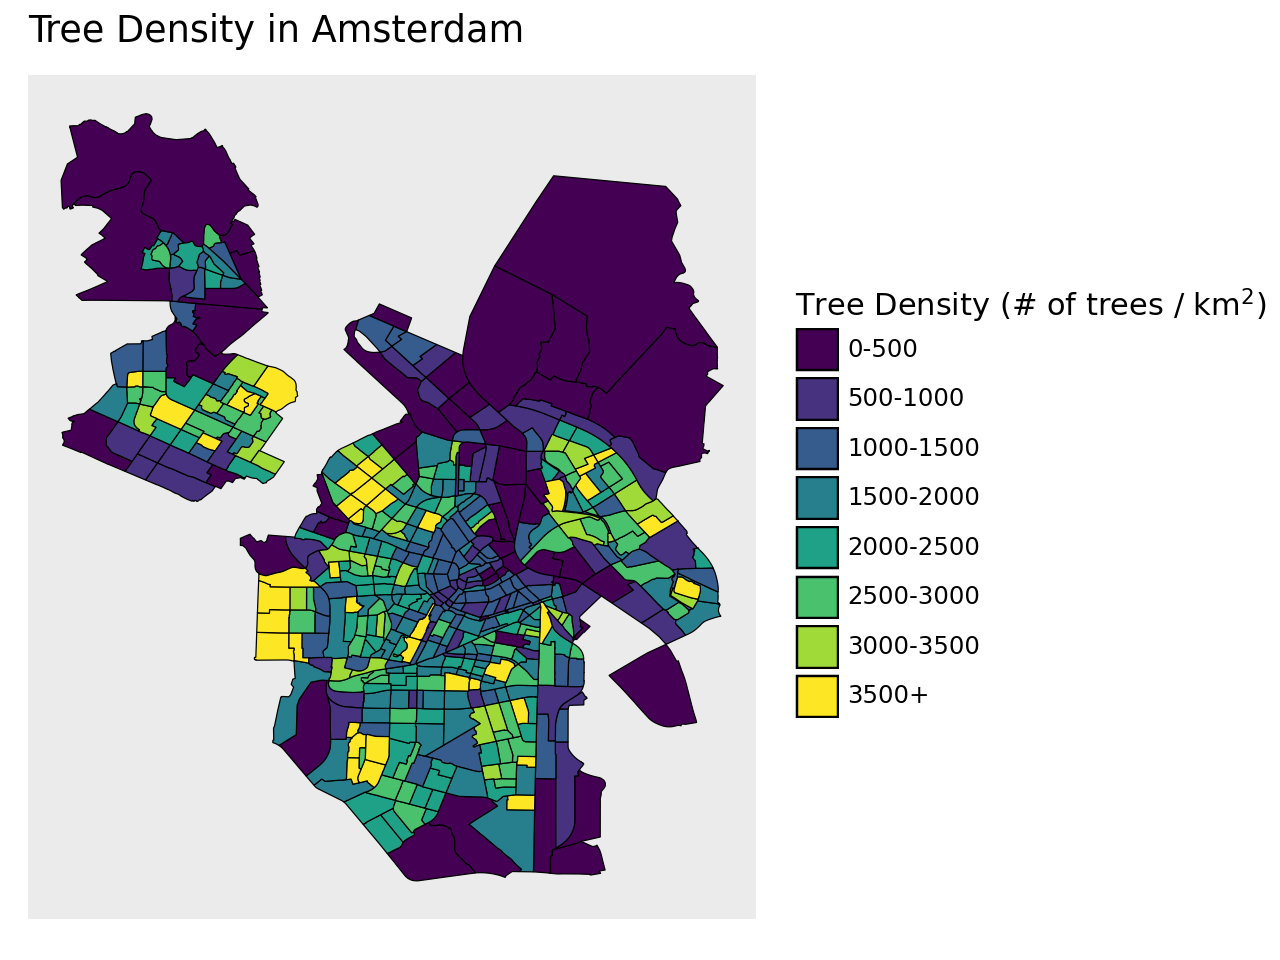

<Figure Size: (640 x 480)>

In [56]:
#tree density throughout the neighborhoods
ggplot(gdf_neighborhoods_density_graph) + \
    geom_map(aes(fill='tree_density_category'), color='black', size = 0.25) + \
    labs(title='Tree Density in Amsterdam', fill = 'Tree Density (# of trees / km$^{2}$)') + \
    theme(panel_grid_major=element_blank(),
              panel_grid_minor=element_blank(),
              panel_border=element_blank(),
          axis_line=element_blank(),
              axis_ticks=element_blank(),
              axis_text=element_blank(),
              axis_title=element_blank())

As we assumed, tree density is higher outside of the city center. Amsterdam city center is very dense and compact, leaving little room for urban trees. This map and the neigborhood polygons tell this story very clearly.

### 5.1.2 Flood Risk in Amsterdam

In [57]:
# Define the bins and labels for tree density categories
bins_2 = [1, 2, 3, 4, float('inf')]
labels_2 = ['1', '2', '3', '4']
# Create a new column in neighborhood_density GeoDataFrame with tree density categories
gdf_flood['flood_score'] = pd.cut(gdf_flood['Kans_code'], bins=bins_2, labels=labels_2, right=False)

In [58]:
projected_crs_graph = 'EPSG:4326'
gdf_flood_graph = gdf_flood.to_crs(projected_crs_graph)

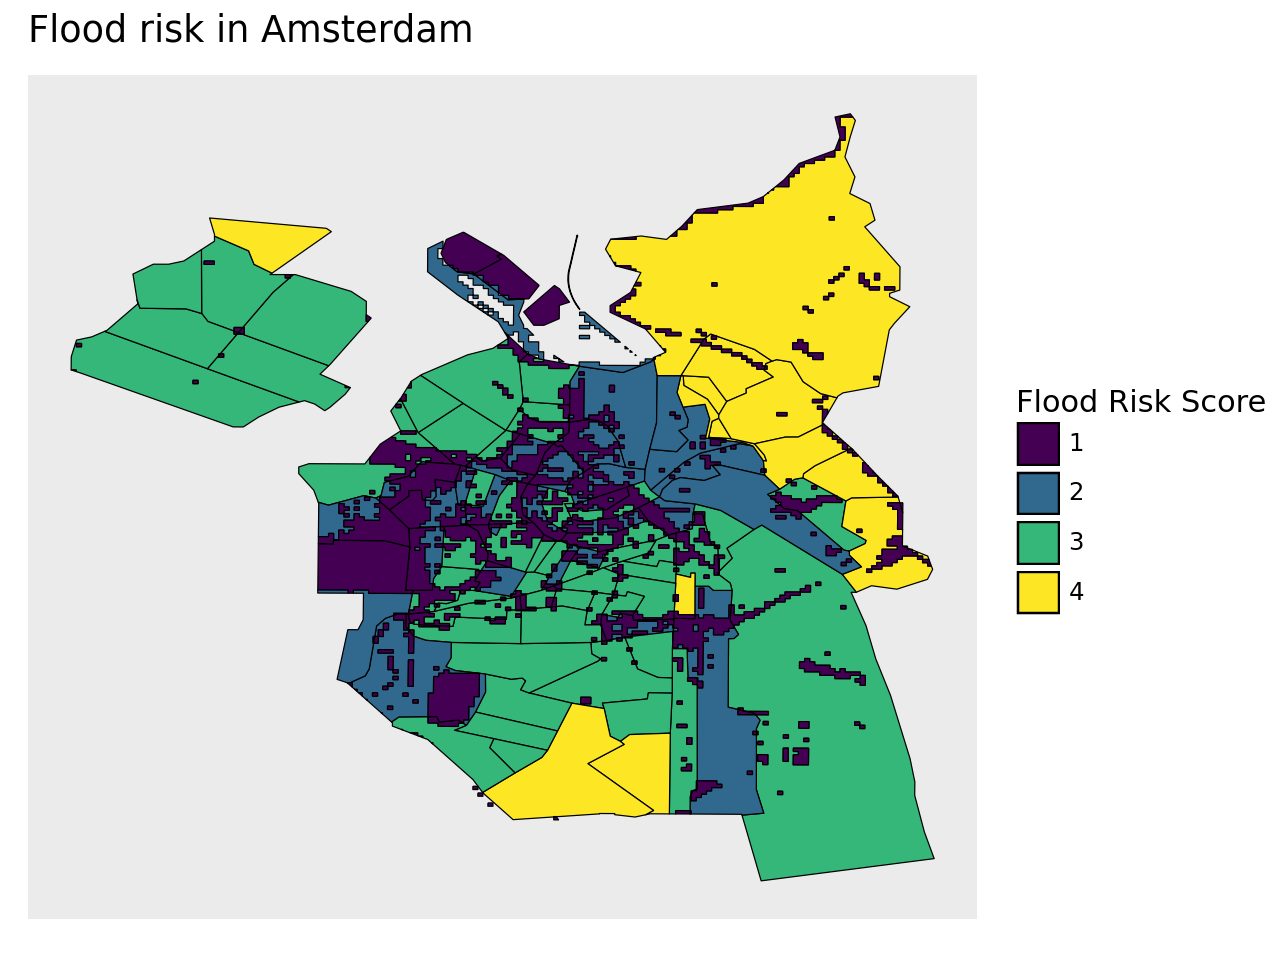

<Figure Size: (640 x 480)>

In [59]:
ggplot(gdf_flood_graph) + \
    geom_map(aes(fill='flood_score'), color='black', size = 0.25) + \
    labs(title='Flood risk in Amsterdam', fill = 'Flood Risk Score') + \
    theme(panel_grid_major=element_blank(),
              panel_grid_minor=element_blank(),
              panel_border=element_blank(),
          axis_line=element_blank(),
              axis_ticks=element_blank(),
              axis_text=element_blank(),
              axis_title=element_blank())

Despite the statistical analysis showing us earlier that there is no significant difference in tree density between any of the flood risk categories and thus likely no relationship between the density of city trees and the level of flood risk (see 4.1.2), we were still curious to map the flood risk score and flood chance score. It is difficult to interpret any significance by just the visuals, but it appears that low flood risk areas are sprinkled throughout the city like pixels, and can be in the middle of high flood risk areas, as shown by dark pixels within yellow polygons.

### 5.1.3 Housing Prices in Amsterdam

In [60]:
projected_crs_graph = 'EPSG:4326'
gdf_housing_graph = gdf_housing.to_crs(projected_crs_graph)

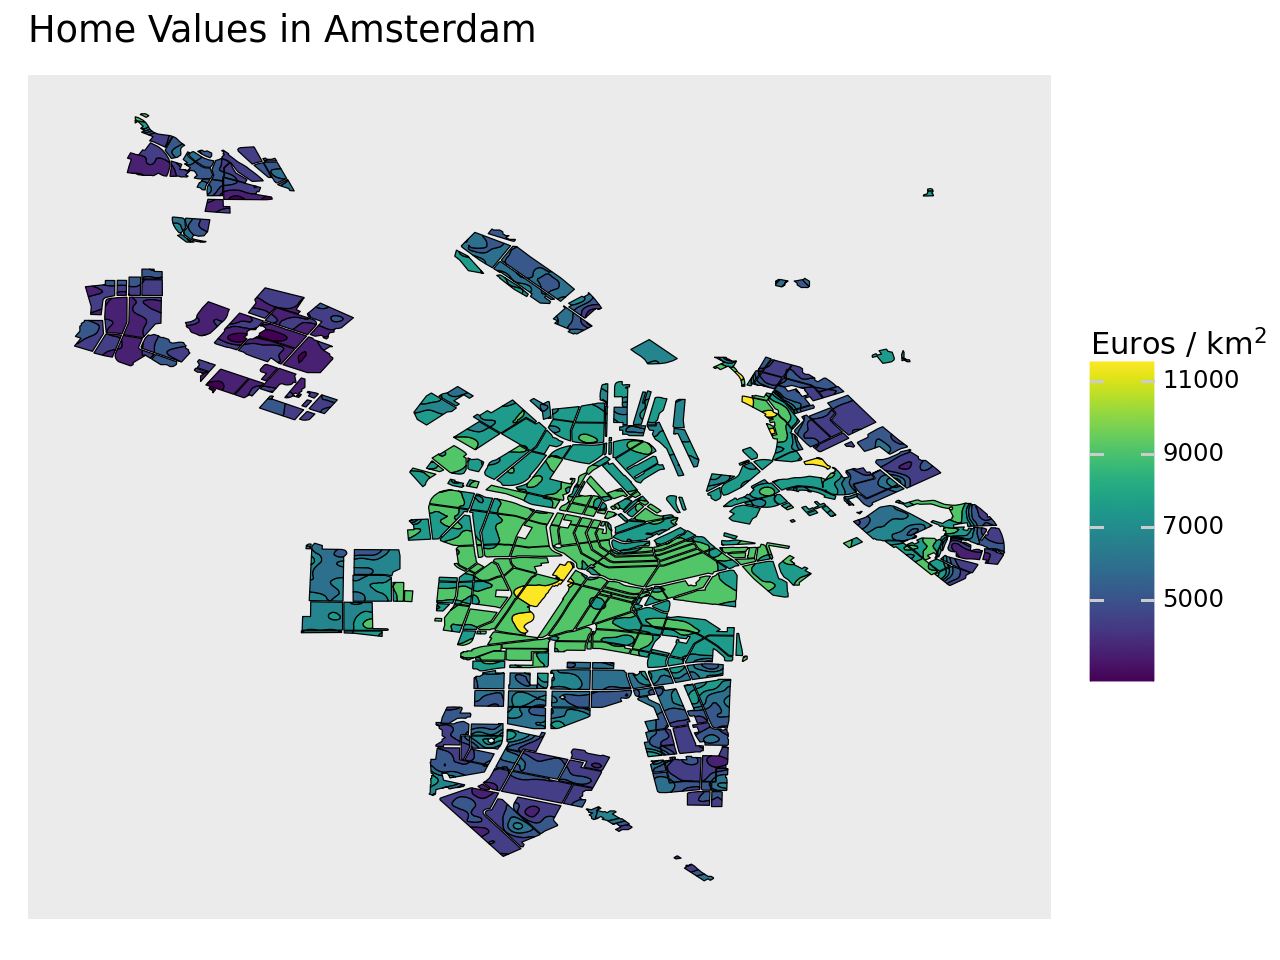

<Figure Size: (640 x 480)>

In [61]:
#Housing price areas
ggplot(gdf_housing_graph) + \
    geom_map(aes(fill='price'), color='black', size = 0.25) + \
    labs(title='Home Values in Amsterdam', fill = 'Euros / km$^{2}$') + \
    theme(panel_grid_major=element_blank(),
              panel_grid_minor=element_blank(),
              panel_border=element_blank(),
          axis_line=element_blank(),
              axis_ticks=element_blank(),
              axis_text=element_blank(),
              axis_title=element_blank())

This map highlights the limitations of the housing value data available, considering the various blank polygons on the map compared to the other two maps of Amsterdam. As we assumed, areas within the city center are more expensive and higher price per size. It is also interesting to see the highest price home values (yellow) in areas that border a very famous and admired park in Amsterdam: Vondelpark.

## 5.2 Plots

### 5.2.1 Tree Density by Flood Risk Category

In [62]:
# Define the bins and labels for tree density categories
bins_2 = [1, 2, 3, 4, float('inf')]
labels_2 = ['1', '2', '3', '4']
# Create a new column in neighborhood_density GeoDataFrame with tree density categories
gdf_flood_density['flood_score'] = pd.cut(gdf_flood_density['Kans_code'], bins=bins_2, labels=labels_2, right=False)

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 9 rows containing non-finite values.


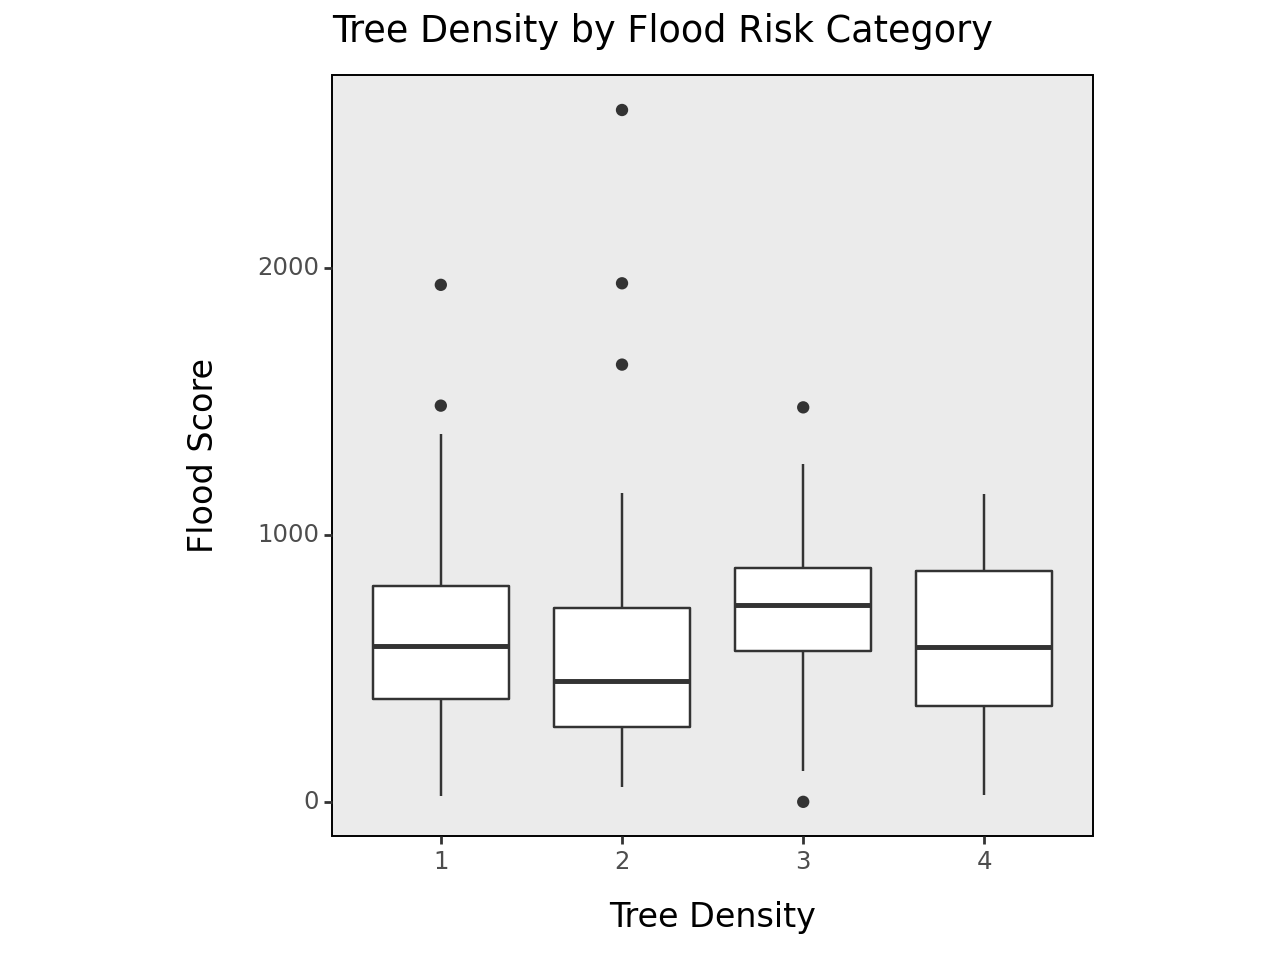

<Figure Size: (640 x 480)>

In [63]:
ggplot(gdf_flood_density, aes(x = 'flood_score', y = 'tree_density')) + \
geom_boxplot() + \
labs(x = "Tree Density",
     y = "Flood Score",
     title="Tree Density by Flood Risk Category") + \
theme(panel_grid_major = element_blank(),
     panel_grid_minor=element_blank(),
      panel_border = element_rect(colour = "black", size=.7),
        axis_title_x = element_text(margin={'t': 10}, size=12),
        axis_title_y = element_text(margin={'r': 10}, size=12),
        aspect_ratio = 10/10)

This boxplot confirms the statistical analysis of flood score and tree density that there is no statistical signifiance between the two variables. By examining the distribution of tree density across flood risk categories, we can assess whether there are noticeable differences in tree density levels among different flood risk levels. There are no distinct differences in the median or distribution of tree density between flood risk categories because the boxplot shows no distributions of tree density across flood risk categories, thus implying that flood risk may not be a significant determinant of tree density in the area.

### 5.2.2 Housing Price by Tree Density

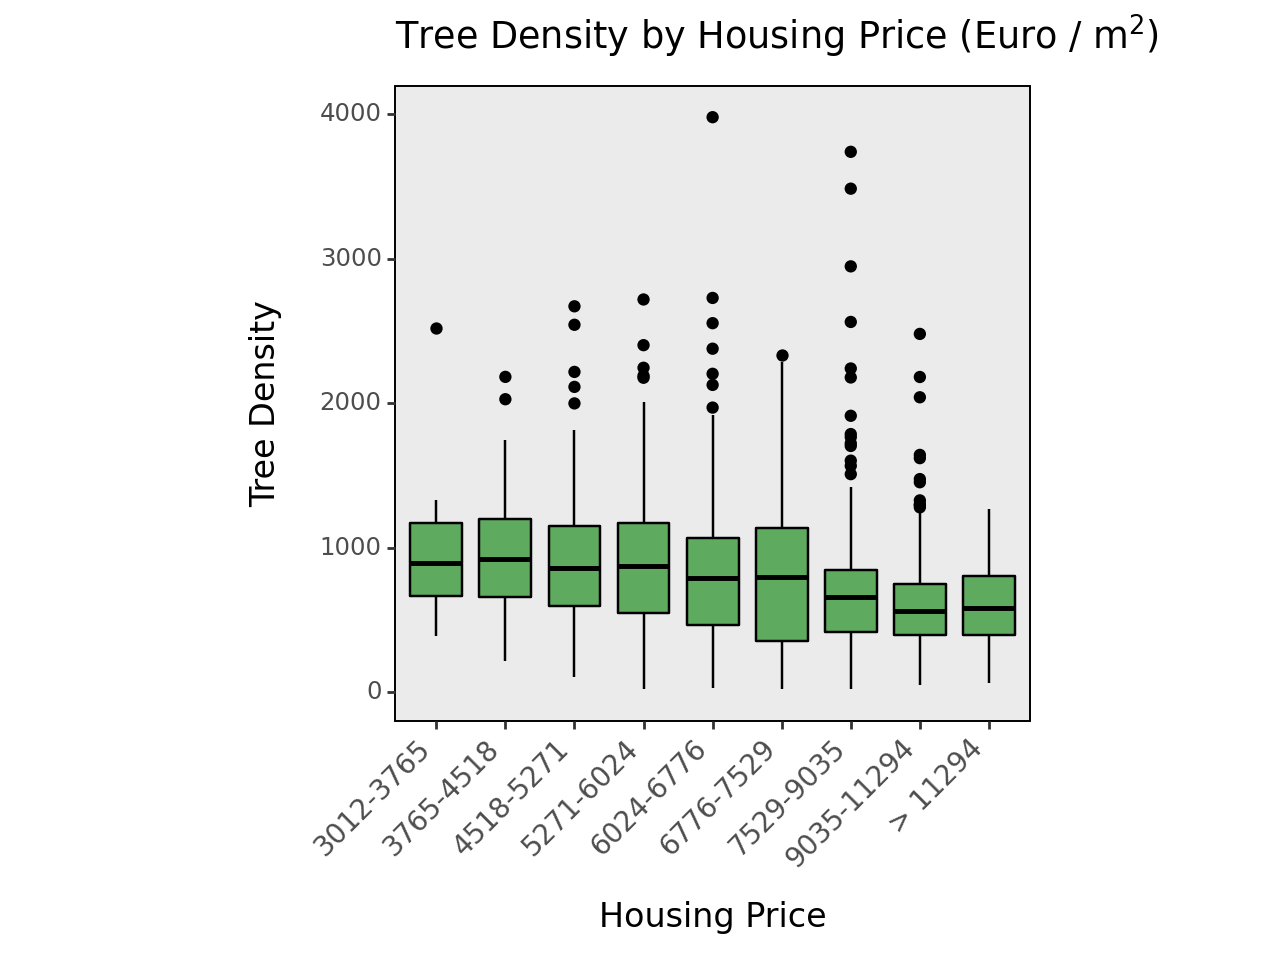

<Figure Size: (640 x 480)>

In [73]:
from plotnine import ggplot, aes, geom_boxplot, labs, theme, element_blank, element_rect, element_text, coord_cartesian

ggplot(gdf_housing_density, aes(x='LABEL', y='tree_density')) + \
    geom_boxplot(fill="green", color="black", alpha=0.6) + \
    labs(x="Housing Price", y="Tree Density", title="Tree Density by Housing Price (Euro / m$^{2}$)") + \
    theme(panel_grid_major=element_blank(),
          panel_grid_minor=element_blank(),
          panel_border=element_rect(color="black", size=0.7),
          axis_title_x=element_text(margin={'t': 10}, size=12),
          axis_title_y=element_text(margin={'r': 10}, size=12),
          axis_text_x=element_text(rotation=45, hjust=1, size=10),
          aspect_ratio=10/10) + \
    coord_cartesian(ylim=(0, 4000))


This boxplot visualizes the results of the data much more clearly! As we can see, as housing price increases, tree density decreases. There is a negative association between tree density and property values. Higher tree density appears to be associated with lower property prices.

# 6.0 Answer Research Question:
 What is the relationship between urban trees in Amsterdam and socio-economic indicators, such as house price, and climate risk, such as flood risk?

**How do the findings inform the project question(s)?**

The findings suggest that tree density has contrasting relationships with socio-economic indicators and climate risk in Amsterdam. In the context of house prices, the analysis indicates a negative association between tree density and property values. Higher tree density appears to be associated with lower property prices. Conversely, regarding flood risk, the analysis suggests no significant relationship between tree density and flood risk levels. Tree density does not seem to vary significantly among different levels of flood risk. These findings imply that while urban trees may influence housing values, their impact on flood risk levels may be negligible in this context.

**What follow-up questions are there?**
Given the negative association between tree density and house prices, a follow-up question could be: What are the underlying mechanisms driving this relationship? Further exploration could involve investigating factors such as neighborhood aesthetics, property maintenance costs, and resident preferences.
Another follow-up question could be: What other socio-economic indicators are influenced by tree density in Amsterdam? This could involve examining additional indicators such as crime rates, public health outcomes, and community cohesion to gain a more comprehensive understanding of the socio-economic impact of urban trees. Regarding flood risk, a follow-up question could be: What are the primary drivers of flood risk in Amsterdam if tree density does not significantly influence flood risk levels? This could involve exploring alternative factors such as land use patterns, drainage infrastructure, and climate change impacts on precipitation patterns.

**What next steps could you take to further the analysis?**
To further the analysis of relationship between tree density and house prices, additional analysis could involve incorporating more comprehensive models that account for other potential determinants of property values, such as neighborhood amenities, transportation accessibility, and housing characteristics. Exploring the spatial distribution of urban trees and their relationship with socio-economic indicators and flood risk levels through geospatial analysis could provide valuable insights into spatial patterns and hotspots.
Conducting qualitative research, such as surveys or interviews with residents and stakeholders, could help elucidate perceptions and attitudes towards urban trees and their influence on housing values and climate risk perception. Engaging with local authorities and urban planners to integrate findings into urban green space planning and flood risk management strategies could lead to more informed decision-making and sustainable urban development practices.


